In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
from hmmlearn import hmm

In [15]:
data = yf.download("AAPL", start="2010-01-01", end="2020-01-01")
returns = np.log(data.Close / data.Close.shift(1))
range = (data.High - data.Low)
features = pd.concat([returns, range], axis=1).dropna()
features.columns = ["returns", "range"]

[*********************100%%**********************]  1 of 1 completed


In [16]:
model = hmm.GaussianHMM(
    n_components=3,
    covariance_type="full",
    n_iter=1000,
)
model.fit(features)

GaussianHMM(covariance_type='full', n_components=3, n_iter=1000)

<Axes: >

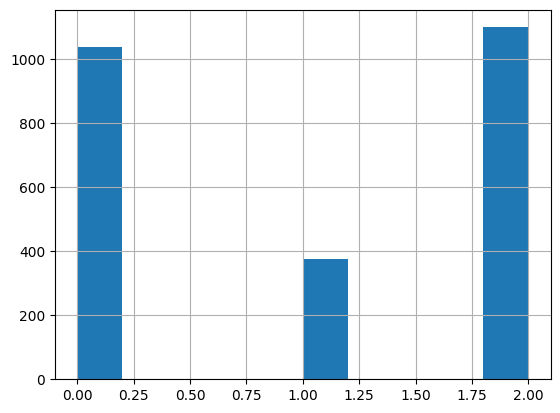

In [17]:
states = pd.Series(model.predict(features), index=data.index[1:])
states.name = "state"
states.hist()

<Axes: xlabel='Date'>

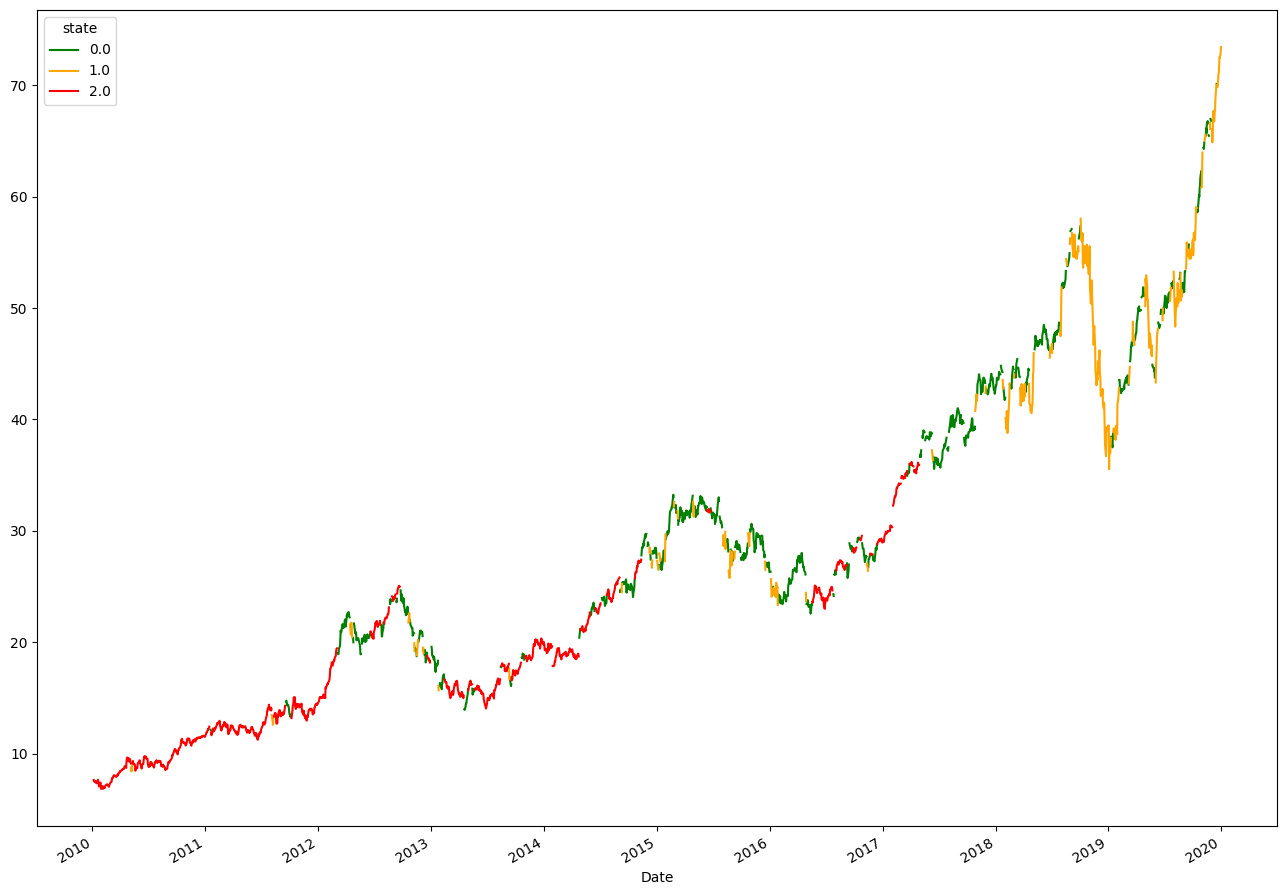

In [18]:
color_map = {
    0.0: "green",
    1.0: "orange",
    2.0: "red"
}
(
    pd.concat([data.Close, states], axis=1)
    .dropna()
    .set_index("state", append=True)
    .Close
    .unstack("state")
    .plot(color=color_map, figsize=[16, 12])
)